In [1]:
from detection import mtcnn_evaluate, load_file_dict, load_bbox_dict, rescale
from facenet_pytorch import MTCNN
import torch

In [2]:
from detection import face_detect
from PIL import Image
import numpy as np

file_source = '/home/jupyter/data/dict/file_dict.txt'
file_dict = load_file_dict(file_source)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)

[[164, 70, 185, 106, 0.99963534], [97, 59, 117, 92, 0.9999999], [40, 109, 57, 135, 0.99936455]]


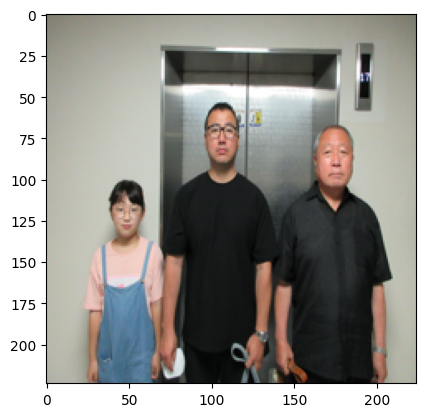

In [4]:
import matplotlib.pyplot as plt
for i in range(len(file_dict.keys())):
    file_key = list(file_dict.keys())[i]
    img_dir = file_dict[file_key]['image']
    orig_image = Image.open(img_dir)
    image = np.array(orig_image)
    
    pred_box = face_detect(image,mtcnn) # pred_box = [bbox좌표,conf]

    # image & bbox rescale(224x224)
    new_box_label, resize_img = rescale(orig_image, 224,pred_box, mtcnn=True, resize_img=True)
    
    # box list 가장 뒤에 confidence score 출력
    print(new_box_label) # resize된 이미지에서의 bbox좌표
    resize_img = orig_image.resize((224,224))
    plt.imshow(resize_img)
    plt.show()
    break

In [1]:
import torch
torch.cuda.empty_cache()